In [180]:
%load_ext autoreload
%autoreload 2

In [181]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time, math

In [175]:
def rng():
    return np.random.rand()
#     return xoroshiro128p_uniform_float32(rng_states, thread_id)

def ln(p):
    ranNum = rng()
    return -math.log(ranNum)*p
#     ranNum = curand_uniform(local_rand_state);


def domhit(center, radius, ro, rd, t_min, t_max):
    oc = ro - center
    a = rd.dot(rd)
    b = oc.dot(rd)
    c = oc.dot(oc) - radius*radius
    discriminant = b*b - a*c
    if discriminant > 0:
        temp = (-b - math.sqrt(b*b - a*c))/a
        if temp < t_max and temp > t_min:
            pHit = ro + rd*temp
            tHit = temp
            return True, pHit, tHit

        temp = (-b + math.sqrt(b*b - a*c))/a
        if temp < t_max and temp > t_min:
            pHit = ro + rd*temp
            tHit = temp
            return True, pHit, tHit
    return False, 0, 0


def get_random_dir():
    d = rng()*math.pi*2
    vx = math.cos(d)
    vy = math.sin(d)
    return np.array([vx, vy], dtype=np.float32)
#     return np.array([-1, 0], dtype=np.float32)


In [223]:
def calc_hits(pInit, pOut, doms, rs, domhits, domhitstimes, pa, ps, Nphotons):
    thread_id = 0
    if thread_id < Nphotons:
        rd = get_random_dir() 
        ro = pInit
        pDist = ln(pa)
        scatter = ln(ps)
        t = 0
        while scatter < pDist:

            for i in range(len(doms)):
                center = doms[i]
                radius = rs[i]
                hit, pHit, tHit = domhit(center, radius, ro, rd, 0, scatter)
                if hit:
                    domhits[thread_id, i] += 1
                    domhitstimes[thread_id, i] = t + tHit
                    pOut[thread_id, 0] = pHit[0]
                    pOut[thread_id, 1] = pHit[1]
                    return

            t += scatter
            ro += rd*scatter
            pDist -= scatter
            rd = get_random_dir()
            scatter = ln(ps)
            
        for i in range(len(doms)):
            center = doms[i]
            radius = rs[i]
            hit, pHit, tHit = domhit(center, radius, ro, rd, 0, pDist)
            if hit:
                domhits[thread_id, i] += 1
                domhitstimes[thread_id, i] = t + tHit
                pOut[thread_id, 0] = pHit[0]
                pOut[thread_id, 1] = pHit[1]
                return

        pOut[thread_id, 0] = np.nan
        pOut[thread_id, 1] = np.nan




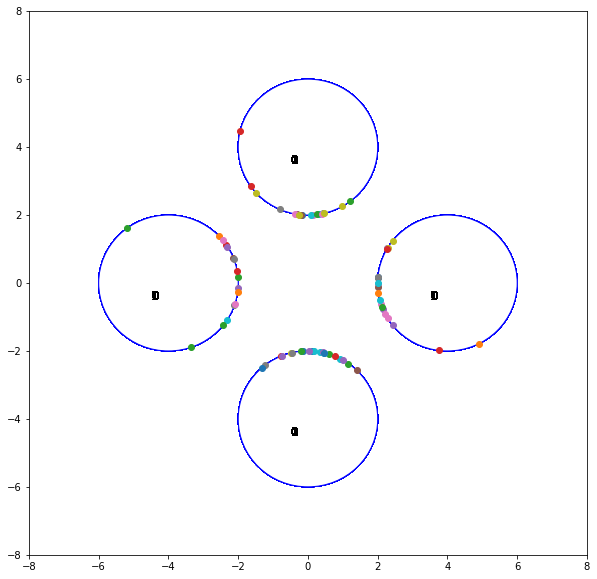

In [225]:
Nphotons = 10
N = 1
pa = 20
ps = 5

fig, ax = plt.subplots(figsize=(10,10))
for i in range(100):
    domhits = np.zeros(1)
    pInit = np.zeros(2)
    pOut= np.zeros((1,2))


    doms = np.array([[ 4,  0],
                     [-4,  0],
                     [ 0,  4],
                     [ 0, -4]], dtype=np.float32)

    r = 2
    rs = np.ones(len(doms), dtype=np.float32)*r

    domhits = np.zeros((N, len(rs)), dtype=np.int32)
    domhitstimes = np.zeros((N, len(rs)), dtype=np.float32)


    calc_hits(pInit, pOut, doms, rs, domhits, domhitstimes, pa, ps, Nphotons)





    grid = [[-8, 8],
            [-8, 8]]

    for center, radius, hits in zip(doms, rs, domhits[0]):
        c = plt.Circle(center, radius, fc="white", ec="blue")
        ax.add_artist(c)
        ax.text(center[0]-0.5, center[1]-0.5, hits, fontsize=12)

    if grid is not None:
        ax.set_xlim(grid[0][0], grid[0][1])
        ax.set_ylim(grid[1][0], grid[1][1])


    ax.scatter(*pOut[0], zorder=3)



In [79]:
# x_start, y_start = np.array(initial_position, dtype=np.float32)
# out_x, out_y = np.zeros(N, dtype=np.float32), np.zeros(N, dtype=np.float32)
# initial_position = np.zeros(2)
# np.nan
# math.log()

In [2]:
a = [1, 2, 3]
b = [1, 2, 3]

14

In [26]:
import numpy as np
import math

In [98]:
t_min = 0
t_max = 100
ro = np.array([0,0], dtype=np.float32)
rd = np.array([1,0], dtype=np.float32)

center = np.array([2, 0])
radius = 2


domhit, pHit, tHit = hit(center, radius, ro, rd, t_min, t_max)

print domhit, pHit, tHit


True [4. 0.] 4.0
